In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_sub2000 = df.loc[df["Year"] < 2000]
df_up2000 = df.loc[df["Year"] >= 2000]
df_sub2000 = df_sub2000.drop_duplicates(['Name', 'Year'])
df_up2000 = df_up2000.drop_duplicates(['Name', 'Year'])

# 1

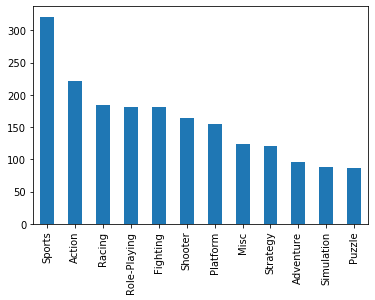

In [5]:
df_sub2000.Genre.value_counts().plot.bar()

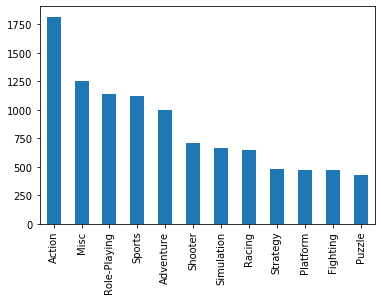

In [6]:
df_up2000.Genre.value_counts().plot.bar()

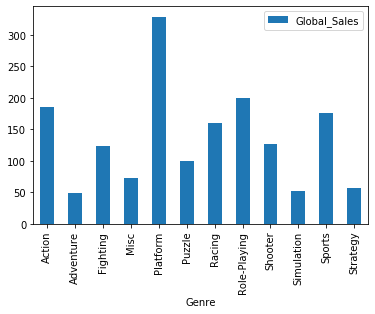

In [7]:
df_sub2000.groupby('Genre').agg({'Global_Sales':'sum'}).plot.bar()

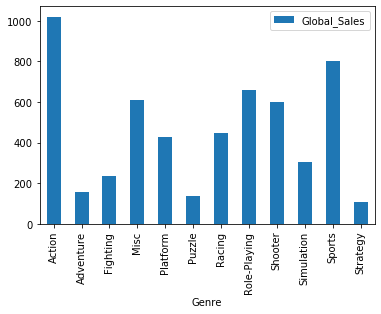

In [8]:
df_up2000.groupby('Genre').agg({'Global_Sales':'sum'}).plot.bar()

# 2

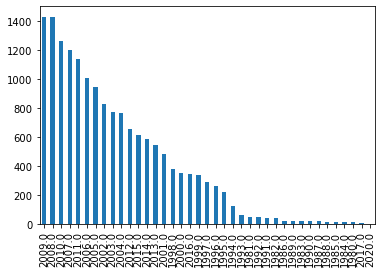

In [9]:
df.Year.value_counts().plot.bar()

# 3

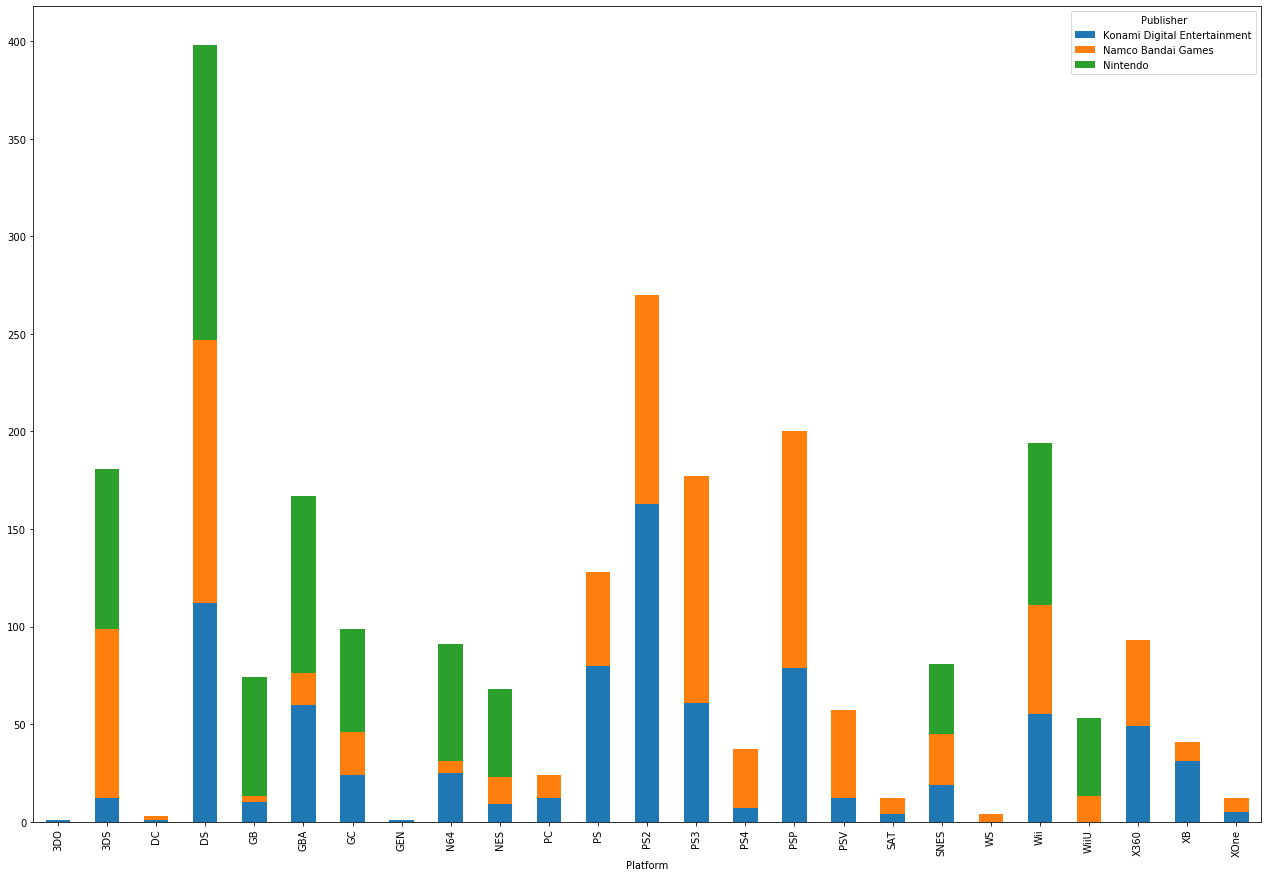

In [26]:
publishers = df.groupby("Publisher")["Name"].nunique().nlargest(3)

platforms = df[df["Publisher"].isin(publishers.index)].groupby(["Publisher","Platform"])["Name"].nunique()
platforms = platforms.unstack(level=0)

platforms.plot.bar(figsize=(22, 15), layout=(3, 2), stacked=True)

# 4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AECCE9508>,
      dtype=object)

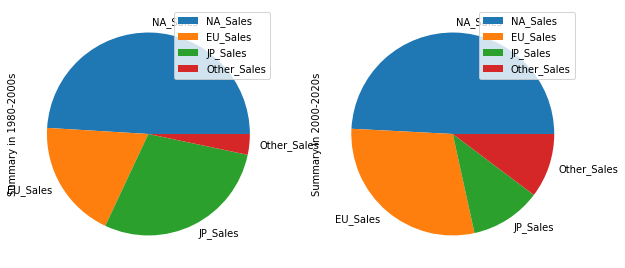

In [11]:
df_b2 = df[df["Year"] < 2000][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=0)
df_a2 = df[df["Year"] >= 2000][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=0)

Summary = pd.DataFrame({"Summary in 1980-2000s": df_b2, "Summary in 2000-2020s": df_a2})
# Summary

Summary.plot.pie(subplots=True, legend=True, figsize=(10, 10))